<a href="https://colab.research.google.com/github/YEON2020/to_localtest/blob/main/%EC%95%88%EC%97%B0%EC%88%98_Kaggle%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow, numpy, pandas, matplotlib**   
- 데이터셋 라이브러리를 활용할 수 있는 오픈소스 라이브러리 import

In [32]:
# Data Manipulation(데이터셋 조정)
import numpy as np
import pandas as pd

# Data Visualization(시각화)
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics(평가 지표)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# Modeling - Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model

In [33]:
!pip install prince

In [34]:
!pip install tensorflow

In [35]:
# Load the dataset
file_path = '/content/salaries.csv'
salaries_df = pd.read_csv(file_path)
salaries_df.shape

(16494, 11)

In [36]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [37]:
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


**Data Preprocessing**

- 데이터 전처리

In [38]:
# Preprocess the dataset(데이터셋 전처리)
salaries_df.fillna(method='ffill', inplace=True)
salaries_df = pd.get_dummies(salaries_df, drop_first=True)

In [39]:
# Define features and target variable(특징 정의, 대상 변수를 객체화)
X = salaries_df.drop(columns=['salary_in_usd'])
y = salaries_df['salary_in_usd']

In [40]:
# Apply Box-Cox Transformation to the target variable(대상 변수에 Box-Cox 변환 적용)
y_boxcox, lam = boxcox(y + 1)  # Adding 1 to avoid zero values(0 값을 피하기 위해 1을 추가)

In [41]:
# Normalize the features(정규화, 특정범위로 일치시킴)
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Deep learning Modeling**
- Starting Deep learning(Sequential 신경망 설계)

In [42]:
# Split the data(데이터 분배)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Define the model(정의 설계)
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

In [44]:
# Compile the model(최적화, 손실)
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
# Early stopping callback(과적합 방지)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

**Deep learning Modeling**

- Train & Test Deep learning(epochs=100)

In [46]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0, callbacks=[early_stopping])

In [47]:
# Prediction(예측)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

104/104 [==============================] - 0s 2ms/step


In [48]:
# Inverse Box-Cox transformation to get back to original scale(Inverse Box-Cox 변환을 통해 원래의 규모로 rollback)
y_train_inv = inv_boxcox(y_train, lam)
y_test_inv = inv_boxcox(y_test, lam)
y_pred_train_inv = inv_boxcox(y_pred_train.ravel(), lam)
y_pred_test_inv = inv_boxcox(y_pred_test.ravel(), lam)

In [49]:
# RMSE(평균 제곱근 오차:Root Mean Square Error, 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이가 있을 경우)
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_pred_train_inv))
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 12369735969468.477
Test RMSE: 14057803960481.984


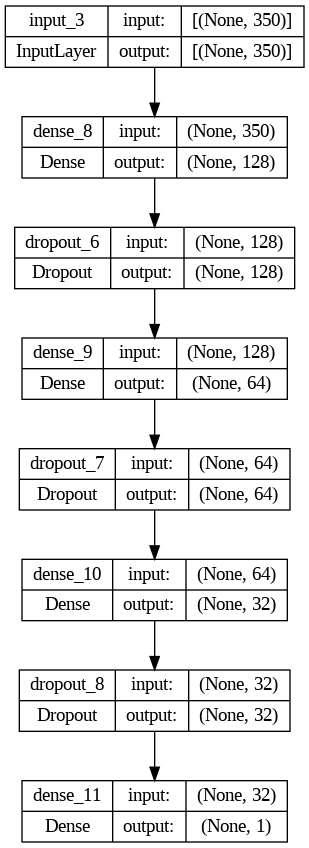

In [50]:
# Plot model architecture(학습모델 구조)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Matplotlib**
- 딥러닝 학습모델 시각화

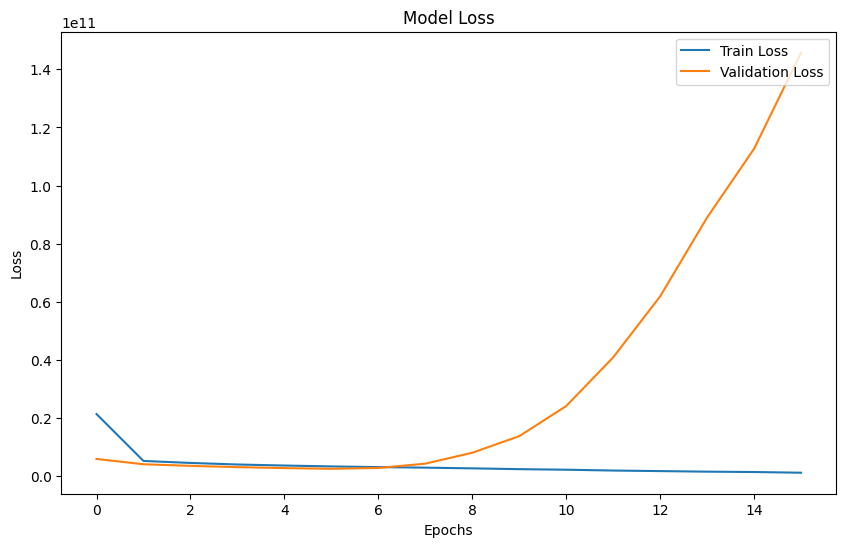

In [51]:
# Visualization of Training History
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

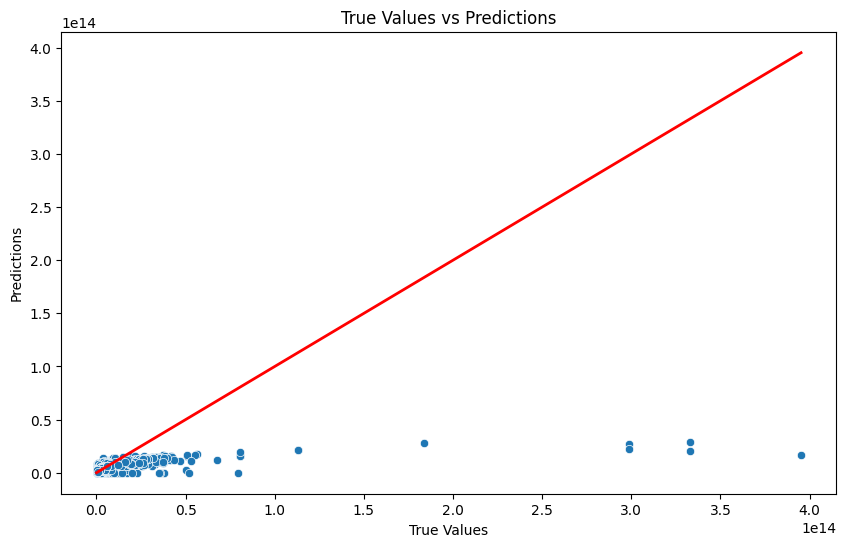

In [52]:
# Visualization of Predictions(예측 시각화)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_inv, y=y_pred_test_inv)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], color='red', linewidth=2)
plt.title('True Values vs Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()